In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
%store -r

In [3]:
plt.style.use('science')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = (5,9)
plt.rcParams['figure.figsize'] = 8,6

In [4]:
import statistics as sts
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.cluster import KMeans

In [6]:
coast_train = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/coast/train.csv")
mountain_train = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/mountain/train.csv")
tallbuilding_train = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/tallbuilding/train.csv")
highway_train = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/highway/train.csv")
opencountry_train = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/opencountry/train.csv")

coast_train.drop(["image_names"],axis = 1,inplace=True)
mountain_train.drop(["image_names"],axis = 1,inplace=True)
tallbuilding_train.drop(["image_names"],axis = 1,inplace=True)
highway_train.drop(["image_names"],axis = 1,inplace=True)
opencountry_train.drop(["image_names"],axis = 1,inplace=True)

In [7]:
coast_test = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/coast/dev.csv")
mountain_test = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/mountain/dev.csv")
tallbuilding_test = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/tallbuilding/dev.csv")
highway_test = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/highway/dev.csv")
opencountry_test = pd.read_csv("/home/hp/Desktop/acads/PRML/assignment2/opencountry/dev.csv")

coast_test.drop(["image_names"],axis = 1,inplace=True)
mountain_test.drop(["image_names"],axis = 1,inplace=True)
tallbuilding_test.drop(["image_names"],axis = 1,inplace=True)
highway_test.drop(["image_names"],axis = 1,inplace=True)
opencountry_test.drop(["image_names"],axis = 1,inplace=True)

In [7]:
mountain_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.029190,0.261551,0.174835,0.054993,0.067581,0.136200,0.209549,0.066101,0.032883,0.140945,...,0.233871,0.042099,0.054321,0.034561,0.141342,0.268097,0.046448,0.088150,0.244537,0.122543
1,0.217682,0.334656,0.302963,0.114136,0.015106,0.008682,0.004944,0.001831,0.063568,0.210526,...,0.004608,0.000198,0.053467,0.182175,0.344467,0.259796,0.140442,0.013397,0.005905,0.000351
2,0.012848,0.167130,0.248734,0.200134,0.124664,0.031235,0.052536,0.162720,0.005020,0.108902,...,0.047958,0.173065,0.037247,0.290833,0.237701,0.149292,0.024902,0.002304,0.002426,0.255295
3,0.078094,0.184402,0.081772,0.091675,0.121658,0.197250,0.129150,0.115997,0.018082,0.163589,...,0.188339,0.151642,0.020157,0.115021,0.158630,0.111740,0.051071,0.032516,0.049698,0.461166
4,0.006500,0.134460,0.265457,0.220367,0.064163,0.041702,0.022430,0.244919,0.006500,0.134155,...,0.040070,0.242432,0.007736,0.158707,0.390015,0.126678,0.024399,0.003571,0.009750,0.279144


In [8]:
cor = coast_train.corr()

In [ ]:
import seaborn as sns

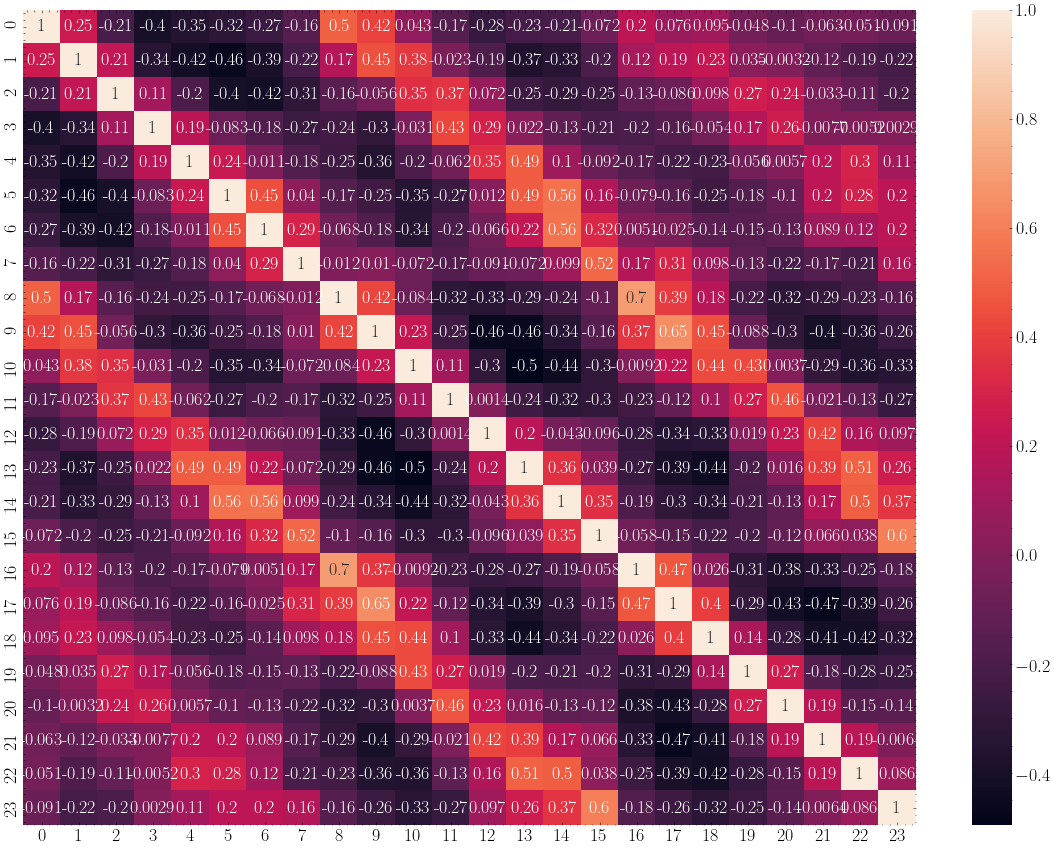

In [13]:
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True)

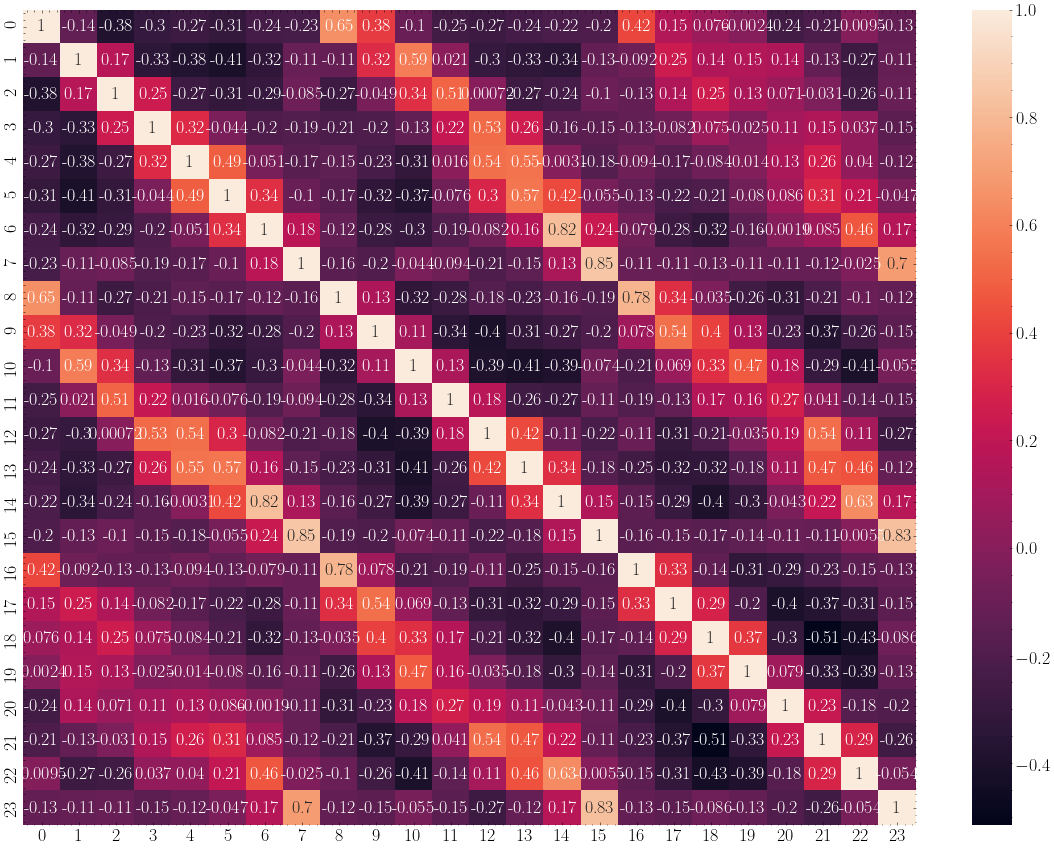

In [14]:
cor = mountain_train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True)

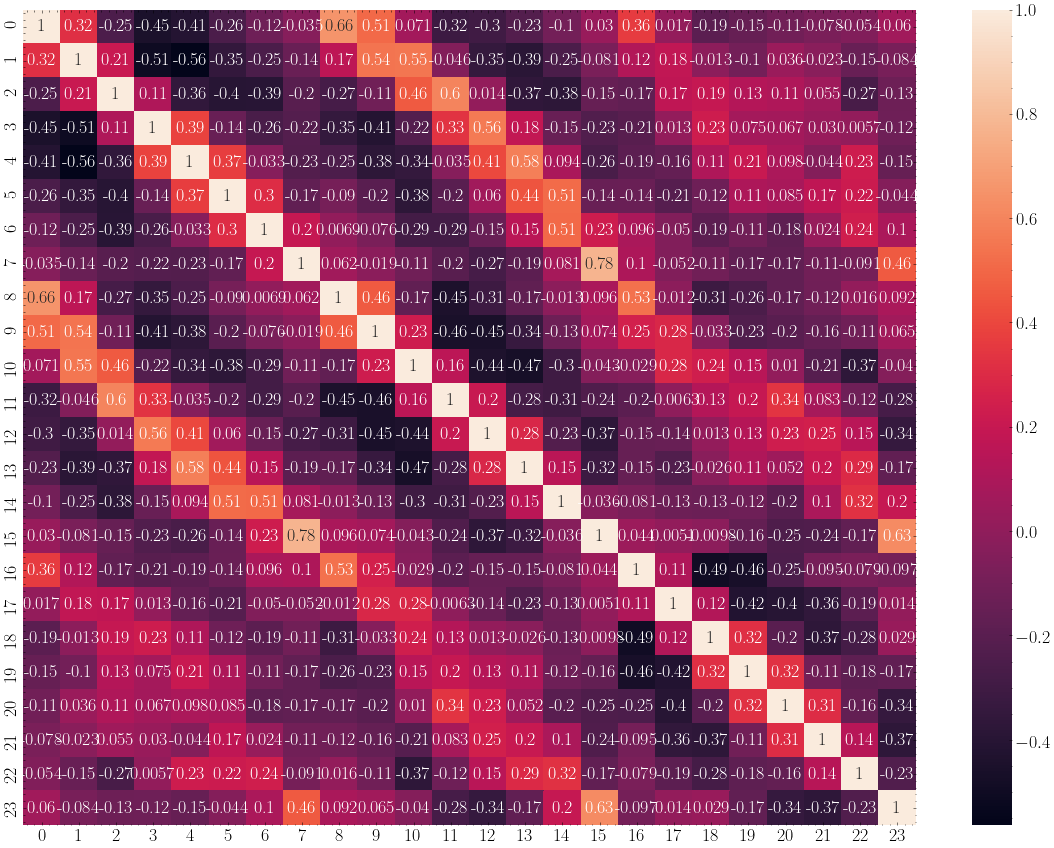

In [15]:
cor = opencountry_train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True)

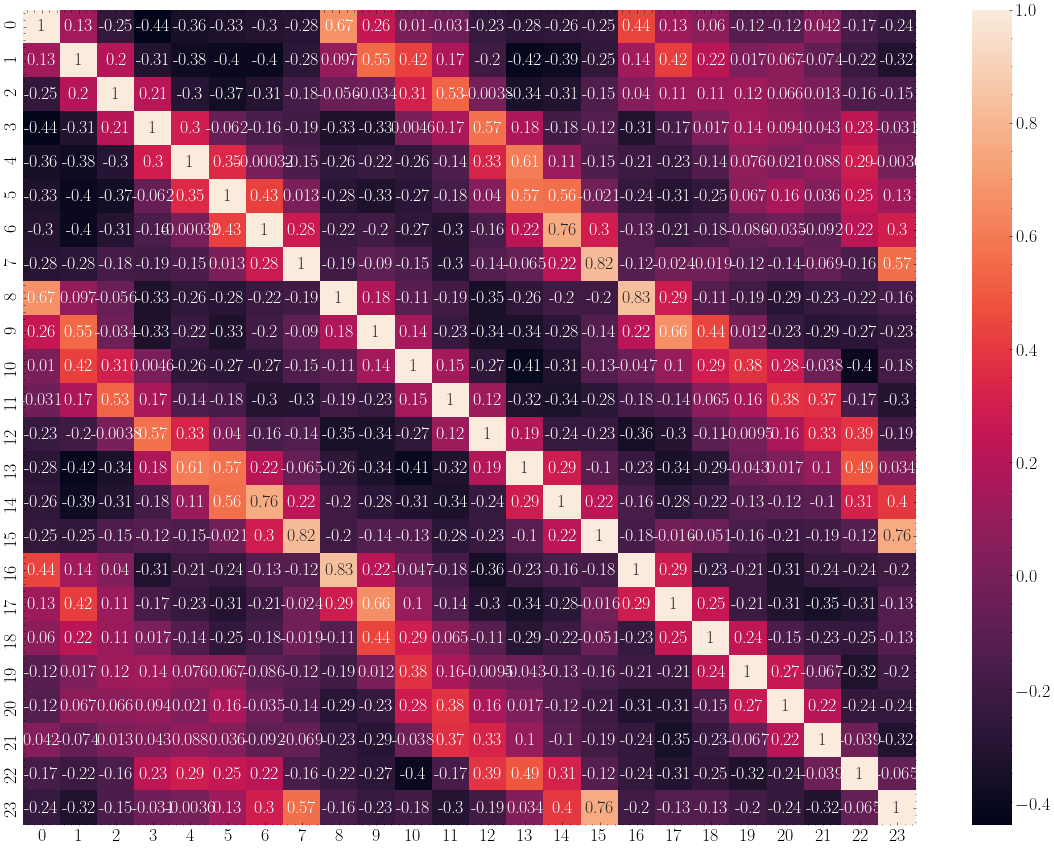

In [16]:
cor = tallbuilding_train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True)

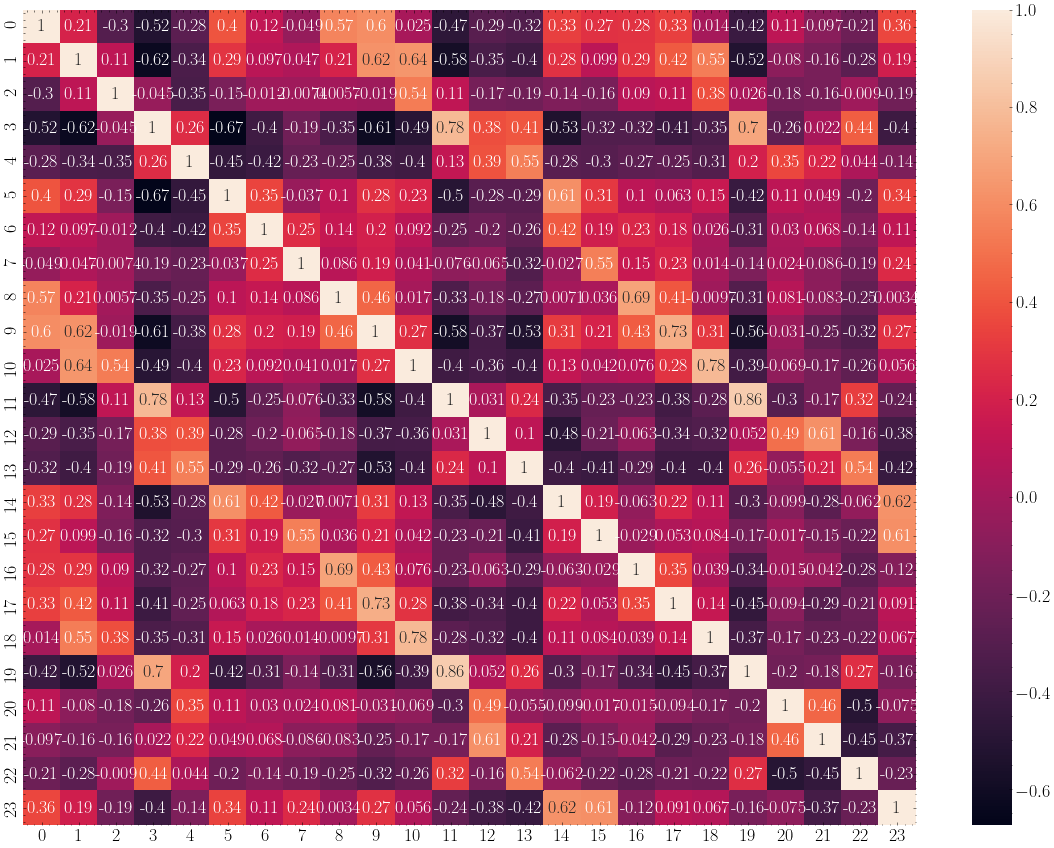

In [17]:
cor = highway_train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True)

In [8]:
def gaus(x,m,c,d):
    c = c + (10**(-7))*np.diag(np.abs(np.random.normal(0,1,c.shape[1])))
    return((1/(((2*np.pi)**(d/2))*np.sqrt(np.linalg.det(c))))*np.exp(-(x-m).T@np.linalg.inv(c)@(x-m)/2))

In [9]:
def likelihood(x,m,W,c):
    s = 0
    #print(len(c))
    
    m = np.array(m)
    l = len(W)
    for i in range(l):
        s += W[i]*gaus(x,m[i],c[i],d)
    return(s)

In [11]:
import time

In [12]:
from multiprocessing import Pool

In [11]:
coast_train.shape

(251, 21)

In [4]:
import pickle

In [9]:
dbfile = open("mountain2a_params","ab")
pickle.dump(mountain_params,dbfile)
dbfile.close()

In [ ]:
dbfile = open("coast2a_params","rb")
coast_params = pickle.load(dbfile)
dbfile.close()
dbfile = open("highway2a_params","rb")
highway_params = pickle.load(dbfile)
dbfile.close()
dbfile = open("tallbuilding2a_params","rb")
tallbuilding_params = pickle.load(dbfile)
dbfile.close()
dbfile = open("opencountry2a_params","rb")
opencountry_params = pickle.load(dbfile)
dbfile.close()
dbfile = open("mountain2a_params","rb")
mountain_params = pickle.load(dbfile)
dbfile.close()


In [28]:
# parameter estimation for Bayesian GMM - EM method
# training and obtaining parameters for different hperparameter values

d = mountain_train.shape[1]
threshold = 0.0001
x_dat = mountain_train
#for Q in q:
def f(Q):
    L_old = 0
    L_new = 1
    L = []
    difference = L_new - L_old
    cond = True
    # inititalization
    while (cond==True):
        kmeans = KMeans(n_clusters = Q, random_state = 0).fit(x_dat)
        labels = kmeans.labels_
        N = np.array([])
        for i in range(Q):
            N = np.append(N,np.count_nonzero(labels==i))
        cond = True in (ele ==1 for ele in N)

    Nt = np.sum(N)
    w = N/Nt
    gamma = []
    for i in range(Q):
        gamma.append(np.multiply(labels==i,1))
    mu = kmeans.cluster_centers_
    n = len(x_dat)
    C = np.zeros((Q,d,d))
    for i in range(Q):
        for j in range(n):
            C[i] += gamma[i][j]*np.outer(x_dat.iloc[j] - mu[i],x_dat.iloc[j] - mu[i])
        C[i] = np.diag(np.diag(C[i]/N[i]))

    L_old = 0
    for i in range(n):
        L_old += np.log(likelihood(x_dat.iloc[i],mu,w,C))
    
    while (difference > threshold):
        

        #Expectation
        den = np.zeros(n)
        for i in range(n):
            for j in range(Q):
                den[i] += w[j]*gaus(x_dat.iloc[i],np.array(mu)[j],C[j],d)

        gamma = np.zeros((Q,n))
        for i in range(n):
            for j in range(Q):
                gamma[j][i] = w[j]*gaus(x_dat.iloc[i], np.array(mu)[j], C[j],d)/den[i]

        # maximization step
        N = []
        for i in range(Q):
            N.append(np.sum(gamma[i]))
        Nt = np.sum(N)
        w = N/Nt
        mu = np.divide(gamma@x_dat,np.array([N]*d).T)
        C = np.zeros((Q,d,d))
        for i in range(Q):
            for j in range(n):
                C[i] += gamma[i][j]*np.outer(x_dat.iloc[j] - mu.iloc[i],x_dat.iloc[j] - mu.iloc[i])
            C[i] = np.diag(np.diag(C[i]/N[i]))

        L_new = 0
        for i in range(n):
            L_new += np.log(likelihood(x_dat.iloc[i],mu.to_numpy(),w,C))
        #print(L_new,L_old)
        difference = L_new - L_old
        L_old = L_new
        L.append(L_new)
    return([mu,w,C,L])
    #L_q.append(L)
    #add accuracy and confusion matrix

In [25]:
pool = Pool(processes=4)

In [26]:
q = list(range(2,14))
pool = Pool(processes=4)
t1 = time.time()
result = pool.map(f,q)
t2 = time.time()

In [18]:
coast12 = f(12)

In [23]:
highway12 = f(12)

In [25]:
tallbuilding12 = f(12)

In [27]:
opencountry12 = f(12)

In [29]:
mountain12 = f(12)

In [28]:
coast_params = result
%store coast_params

Stored 'coast_params' (list)


In [19]:
(t2-t1)/60

64.1458066980044

In [31]:
idx = 1

In [33]:
print(likelihood(coast_train.iloc[idx],coast_params[q_val][0],coast_params[q_val][1],coast_params[q_val][2]))
print(likelihood(coast_train.iloc[idx],highway_params[q_val][0],highway_params[q_val][1],highway_params[q_val][2]))
print(likelihood(coast_train.iloc[idx],tallbuilding_params[q_val][0],tallbuilding_params[q_val][1],tallbuilding_params[q_val][2]))
print(likelihood(coast_train.iloc[idx],opencountry_params[q_val][0],opencountry_params[q_val][1],opencountry_params[q_val][2]))
print(likelihood(coast_train.iloc[idx],mountain_params[q_val][0],mountain_params[q_val][1],mountain_params[q_val][2]))


3122293814278.531
14008.8176203675
363007512095.05566
518160958527.557
288956513675.27997


In [33]:
print(likelihood(coast_train.iloc[idx],coast12[0],coast12[1],coast12[2]))
print(likelihood(coast_train.iloc[idx],highway12[0],highway12[1],highway12[2]))
print(likelihood(coast_train.iloc[idx],tallbuilding12[0],tallbuilding12[1],tallbuilding12[2]))
print(likelihood(coast_train.iloc[idx],opencountry12[0],opencountry12[1],opencountry12[2]))
print(likelihood(coast_train.iloc[idx],mountain12[0],mountain12[1],mountain12[2]))

8514349989225.2295
260816.95223572734
14153897243.5867
47727557546.9574
106045507028342.97


In [37]:
parameters = [coast_params,highway_params,tallbuilding_params,opencountry_params,mountain_params]

In [34]:
parameters = [coast12,highway12,tallbuilding12,opencountry12,mountain12]

In [44]:
X_train = mountain_test
ln = len(X_train)
Y_train = np.array([4]*ln)
acc_train = []

y_Pred = []
for i in range(ln):
    lst = []
    for j in range(5):
        lst.append(likelihood(X_train.iloc[i],parameters[j][0],parameters[j][1],parameters[j][2]))
    y_Pred.append(lst.index(max(lst)))
    #print(lst.index(max(lst)))
    #print(y_Pred[i])
acc_calc = accuracy.Confusion_matrix(y_Pred,Y_train)
print(acc_calc.accuracy)


0.30666666666666664


In [39]:
acc_train

[0.701195219123506]

In [38]:
featvec_length = 24

In [37]:
import accuracy

In [90]:
#predicting training data - selecting max likelihood value
X_train = mountain_train
ln = len(X_train)
Y_train = np.array([4]*ln)
acc_train = []
for Q in range(len(q)):
    y_Pred = []
    for i in range(ln):
        lst = []
        for j in range(5):
            lst.append(likelihood(X_train.iloc[i],parameters[j][Q][0],parameters[j][Q][1],parameters[j][Q][2]))
        y_Pred.append(lst.index(max(lst)))
        #print(lst.index(max(lst)))
        #print(y_Pred[i])
    acc_calc = accuracy.Confusion_matrix(y_Pred,Y_train)
    acc_train.append(acc_calc.accuracy)


In [91]:
ac_train_mountain = acc_train

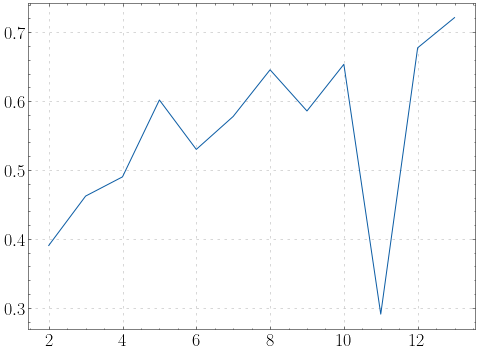

In [75]:
plt.plot(q,acc_train)

In [101]:
coast_cvX,X_test,y_cv,y_test = train_test_split(coast_test,coast_test.iloc[:,2], test_size=0.3, random_state=0)

In [133]:
X_test = mountain_test
ln = len(X_test)

Y_test = np.array([4]*ln)
X_cv,X_test,y_cv,y_test = train_test_split(X_test,Y_test, test_size=0.3, random_state=2)
ln = len(X_cv)

acc_cv = []
for Q in range(len(q)):
    y_Pred = []
    for i in range(ln):
        lst = []
        for j in range(5):
            lst.append(likelihood(X_cv.iloc[i],parameters[j][Q][0],parameters[j][Q][1],parameters[j][Q][2]))
        y_Pred.append(lst.index(max(lst)))
        #print(y_Pred[i])
    acc_calc = accuracy.Confusion_matrix(y_Pred,y_cv)
    acc_cv.append(acc_calc.accuracy)


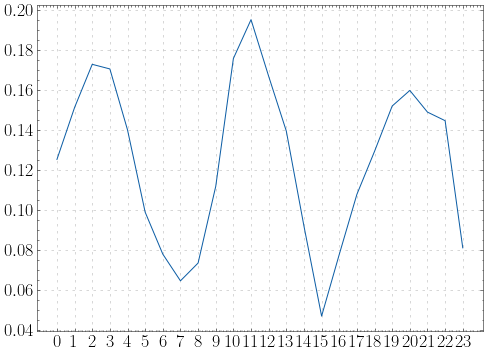

In [145]:
plt.plot(coast_train.mean())

In [139]:
mountain_acCV = acc_cv
%store mountain_acCV

Stored 'mountain_acCV' (list)


In [ ]:
# 0, 1,1,1,0

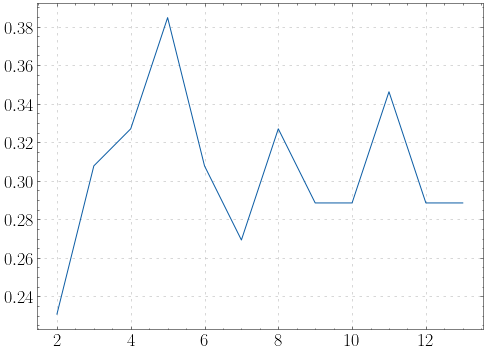

In [131]:
plt.plot(q,acc_cv)

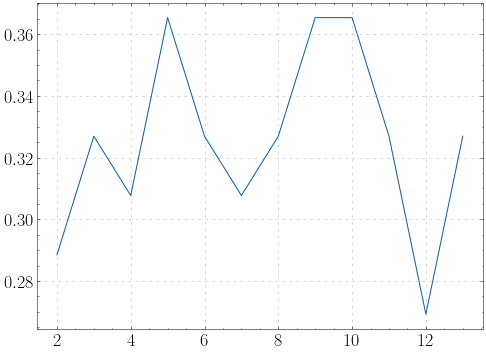

In [141]:
plt.plot(q,mountain_acCV)

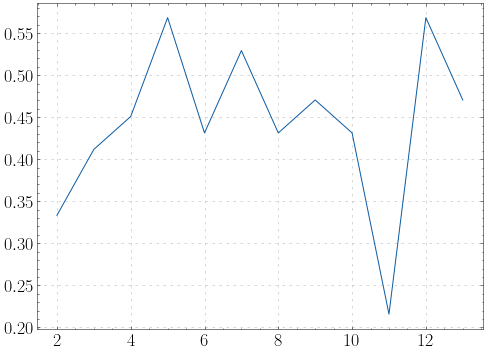

In [135]:
plt.plot(q,coast_acCV)

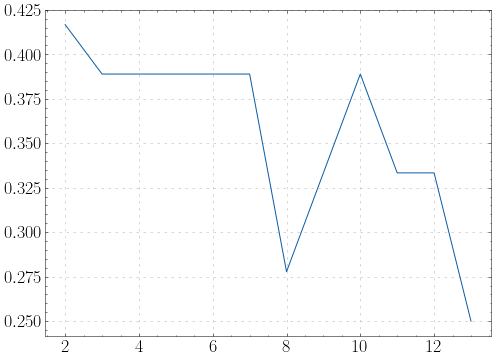

In [136]:
plt.plot(q,highway_acCV)

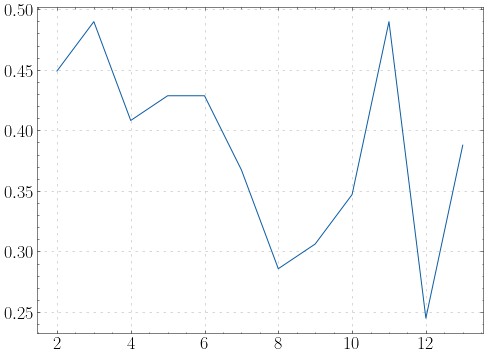

In [137]:
plt.plot(q,tallbuilding_acCV)

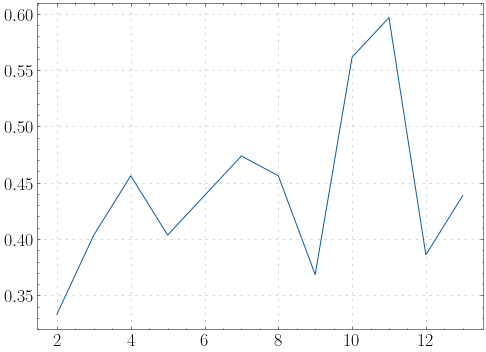

In [138]:
plt.plot(q,opencountry_acCV)